.. _nb_callback:

## Callback

A `Callback` class can be used to receive a notification of the algorithm object each generation.
This can be useful to keep track of metrics, do additional calculations or even modify the algorithm object during the run.
The latter is only recommend for experienced users.

For instance, to keep track of the best solution each generation:

n_gen |  n_eval |     favg     |     fopt    
    1 |     100 |  0.831497479 |  0.387099336
    2 |     200 |  0.578035582 |  0.302189349
    3 |     300 |  0.443207413 |  0.267733594
    4 |     400 |  0.357872037 |  0.150641599
    5 |     500 |  0.299671386 |  0.094357677
    6 |     600 |  0.234146158 |  0.060109551
    7 |     700 |  0.171081605 |  0.048746287
    8 |     800 |  0.124937596 |  0.038399076
    9 |     900 |  0.084117218 |  0.038103929
   10 |    1000 |  0.059793943 |  0.024632439
   11 |    1100 |  0.046106896 |  0.024632439
   12 |    1200 |  0.037648071 |  0.019700400
   13 |    1300 |  0.031444694 |  0.012056202
   14 |    1400 |  0.026908849 |  0.012056202
   15 |    1500 |  0.023684618 |  0.011460899
   16 |    1600 |  0.019972332 |  0.007499104
   17 |    1700 |  0.017528928 |  0.006002021
   18 |    1800 |  0.015283354 |  0.006002021
   19 |    1900 |  0.012730282 |  0.005492378
   20 |    2000 |  0.011035933 |  0.005492378


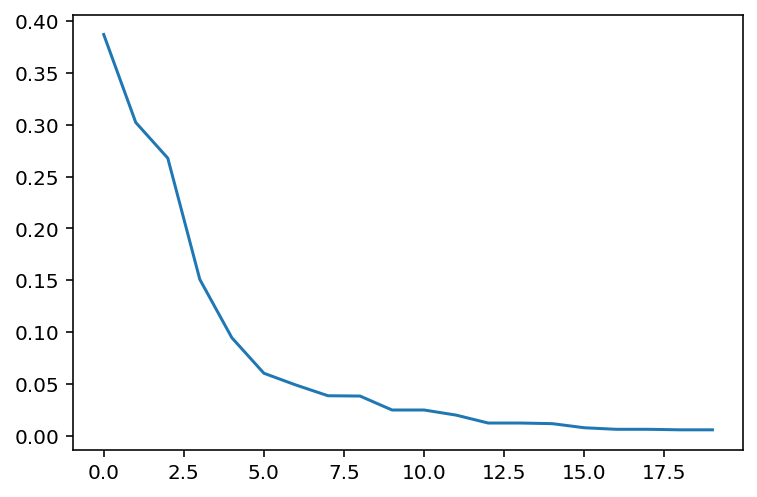

In [1]:
from pymoo.algorithms.nsga2 import NSGA2
from pymoo.algorithms.so_genetic_algorithm import GA
from pymoo.factory import get_problem
from pymoo.model.callback import Callback
from pymoo.optimize import minimize

import numpy as np

import matplotlib.pyplot as plt


class MyCallback(Callback):

    def __init__(self) -> None:
        super().__init__()
        self.data["best"] = []

    def notify(self, algorithm):
        self.data["best"].append(algorithm.pop.get("F").min())


problem = get_problem("sphere")

algorithm = GA(pop_size=100, callback=MyCallback())

res = minimize(problem,
         algorithm,
         ('n_gen', 20),
         seed=1,
         verbose=True)

val = res.algorithm.callback.data["best"]
plt.plot(np.arange(len(val)), val)
plt.show()


If the analysis of the run should be done during post-processing the option `save_history` can be used as well. If a callback is used the history does not need to be saved.
By using the history object the same as above can be achieved by using the stored information during the run:

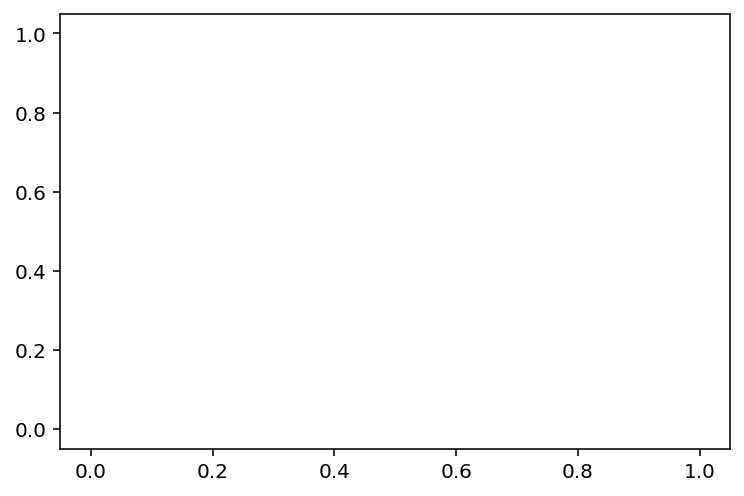

In [2]:
val = [e.pop.get("F").min() for e in res.history]
plt.plot(np.arange(len(val)), val)
plt.show()

If the `save_history` is true a deep copy of the algorithm object takes place each generation. Please note that this can be quite expensive and might not be desired for all runs. However, it provides great post-processing options because all data can be accessed respectively.